In [1]:
from utils import *
import numpy as np
import pickle
import networkx as nx
import neat
import argparse
from tqdm import tqdm
import re
import visualize

In [6]:
def output_activation(x, current_balance):
    # scale the output to ensure that the sum of the bids does not exceed the available balance
    x = [max(bid, 0) for bid in x]
    scale_factor = 0
    if sum(x) != 0:
        scale_factor = current_balance / sum(x)
    return [bid * scale_factor for bid in x]

In [8]:
config_file = "monkey_config.cfg"
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_file)

In [9]:
with open("winning_genome.pkl", "rb") as genome_file:
    winner = pickle.load(genome_file)
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)


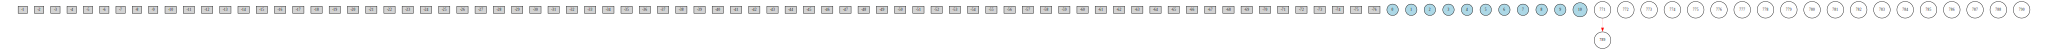

In [11]:
visualize.draw_net(config, winner, True)

In [11]:
#G.10.11
money = 243
model_input = construct_input("graph_info_s1/G.10.11.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

array([  4.,   0.,  42.,   0.,  15.,   0.,   0., 140.,  42.,   0.])

In [ ]:
y2 = np.array([140, 86, 15, 143, 78, 140, 101, 105, 86, 103])

x2 = construct_input("graph_info_s1/O.10.14.html", money)
max_degs = np.array(x2[0:len(x2)-2:3])
num_nodes = np.array(x2[2:len(x2):3])
tot_degs = np.array(x2[1:len(x2)-1:3])

pred(a, b, c, max_degs, num_nodes, tot_degs)

In [12]:
#G.10.12
money = 284
model_input = construct_input("graph_info_s1/G.10.12.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

array([  5.,   0.,  22.,   0.,  81.,   0.,   0., 153.,  23.,   0.])

In [5]:
#O.10.13
money = 133
model_input = construct_input("graph_info_s1/O.10.13.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

<div class="wrapper collapse" id="section-0">
<div class="card-body">
<table class="table table-bordered table-hover">
<thead>
<tr>
<th>specs</th>
<th>value</th>
</tr>
</thead>
<tbody>
<tr>
<th class="fw-normal">max degree</th>
<th class="fw-normal">71</th>
</tr>
<tr>
<th class="fw-normal">number of nodes</th>
<th class="fw-normal">63</th>
</tr>
<tr>
<th class="fw-normal">unique edges (.5 = self edge)</th>
<th class="fw-normal">1209</th>
</tr>
</tbody>
</table>
<form action="/submit/O.10.13/upload" class="my-0" enctype="application/json" method="post">
<div class="row">
<div class="col pt-1">
<div class="float-end">
<label class="d-inline-block me-1 fw-bold" for="bid-number-0">Bid: </label>
<div class="d-inline-block">
<div class="input-group">
<div class="input-group-prepend"> <span class="input-group-text" style="border-radius: 6px 0 0 6px">$</span></div>
<input class="form-control" id="bid-number-0" max="133" min="0" placeholder="0" style="border-radius: 0px 0 0 0px;" type="number"/

NameError: name 'output_activation' is not defined

In [ ]:
# O.10.14
money = 691
model_input = construct_input("graph_info_s1/O.10.14.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

In [25]:
# J.20.15
money = 740
model_input = construct_input("graph_info_s1/J.20.15.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

array([  0.,   0., 120.,  23.,  55.,   0.,   0., 726.,  16.,   0.])

In [26]:
# J.20.16
money = 304
model_input = construct_input("graph_info_s1/J.20.16.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

array([  7.,   0.,  48.,   0.,  31.,   0.,   0., 136.,  81.,   0.])

In [27]:
# J.30.17
money = 452
model_input = construct_input("graph_info_s1/J.30.17.html", money)
bids = np.array(output_activation(winner_net.activate(model_input), money)).round()
bids

array([  0.,   0.,  18.,   0.,   0.,   0.,   0., 354.,  80.,   0.])

In [ ]:
x = construct_input("graph_info_s1/O.10.13.html", money)
print(x)

In [ ]:
max_degs = np.array(x[0:len(x)-2:3])
num_nodes = np.array(x[2:len(x):3])
tot_degs = np.array(x[1:len(x)-1:3])

print(f'max degs:  {max_degs}')
print(f'num nodes: {num_nodes}')
print(f'tot degs:  {tot_degs}')

a = 5
b = 10

ovr = 1.0 * max_degs / np.sum(max_degs) + 1 * num_nodes / np.sum(num_nodes) + 20 * tot_degs / np.sum(tot_degs)
ovr = a * max_degs + b * num_nodes + tot_degs

res = (1000 / np.sum(ovr)) * ovr
print(res)


In [2]:
from datetime import datetime

def error(pred, y):
    return np.sum((y - pred) * (y - pred))

def pred(a, b, c, max, num, tot):
    res =  a * max + b * num + c * tot
    return (1000 / np.sum(res)) * res    

def pred_coefs(max, num, tot, y, a0=1, b0=1, c0=1):
    a = a0
    b = b0
    c = c0 # fix this at 1 bc normalization
    curr_err = error(pred(a, b, c, max, num, tot), y)

    abest = a
    bbest = b
    cbest = c
    errbest = curr_err

    start_time = datetime.now()

    while (datetime.now() - start_time).total_seconds() < 60:
        sets = [(a * 1.1, b, c),
                (a / 1.1, b, c),
                (a, b * 1.1, c),
                (a, b / 1.1, c)]
        
        curr_min = np.Inf

        for a_new, b_new, c_new in sets:
            est = pred(a_new, b_new, c_new, max, num, tot)

            if (est >= 0).all():
                new_err = error(est, y)

                if new_err < curr_min:
                    curr_min = new_err
                    a = a_new
                    b = b_new
                    c = c_new

                if new_err < errbest:
                    errbest = new_err
                    abest = a_new
                    bbest = b_new
                    cbest = c_new

    print(f'best solution is a={abest}, b={bbest}, c={cbest}, err={errbest}')
    return abest, bbest, cbest

In [4]:
y = np.array([100, 13, 132, 121, 94, 79, 102, 97, 148, 109])

x = construct_input("graph_info_s1/O.10.13.html", 1000)
max_degs = np.array(x[0:len(x)-2:3])
num_nodes = np.array(x[2:len(x):3])
tot_degs = np.array(x[1:len(x)-1:3])
print(x)
    

[71, 604.5, 63, 8, 44.0, 33, 149, 609.5, 48, 120, 511.5, 44, 108, 417.5, 46, 150, 276.0, 36, 80, 440.5, 45, 99, 534.5, 57, 68, 839.0, 59, 74, 728.0, 69, 1000]


In [7]:
pred(a, b, c, max_degs, num_nodes, tot_degs)

array([107.34722235,   8.74220232, 133.61960649, 110.48169723,
        93.47453885,  87.56892423,  87.49155634, 106.79409127,
       138.97452434, 125.50563659])

In [8]:
a, b, c = pred_coefs(max_degs, num_nodes, tot_degs, y, 1, 1, 1)

best solution is a=2.357947691000002, b=9.147537007594738e-14, c=1, err=919.3853188598862


In [ ]:
y = np.array([140, 86, 15, 143, 78, 140, 101, 105, 86, 103])

x2 = construct_input("graph_info_s1/O.10.14.html", 1000)
max_degs = np.array(x2[0:len(x2)-2:3])
num_nodes = np.array(x2[2:len(x2):3])
tot_degs = np.array(x2[1:len(x2)-1:3])

pred(a, b, c, max_degs, num_nodes, tot_degs)